In [1]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm

In [2]:
# CHANGE PATH/URL TO SOME PUBLIC DOMAIN
# Load in dataset to pandas DataFrame
dataset = pd.read_excel("Folds5x2_pp.xlsx", sheet_name="Sheet1")

In [3]:
# Check for missing values
sum(dataset.isna().sum())

0

In [4]:
# Looks like there are no missing values
# Check for null values
sum(dataset.isnull().sum())

0

In [5]:
# Looks like there are no null values
# Find the statistics of the dataset
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
# The dataset looks to be consistent. However, we want to rename the columns so they give us 
# better information about the data
dataset.rename(columns={"AT": 'Average Temparature (AT)', "V": 'Exhaust Vaccuum (V)', 
                        "AP": 'Ambient Pressure (AP)', "RH": 'Relative Humidity (RH)', 
                        "PE": 'Electrical Energy Output (PE)'}, inplace=True)

In [7]:
dataset.head()

,Average Temparature (AT),Exhaust Vaccuum (V),Ambient Pressure (AP),Relative Humidity (RH),Electrical Energy Output (PE)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


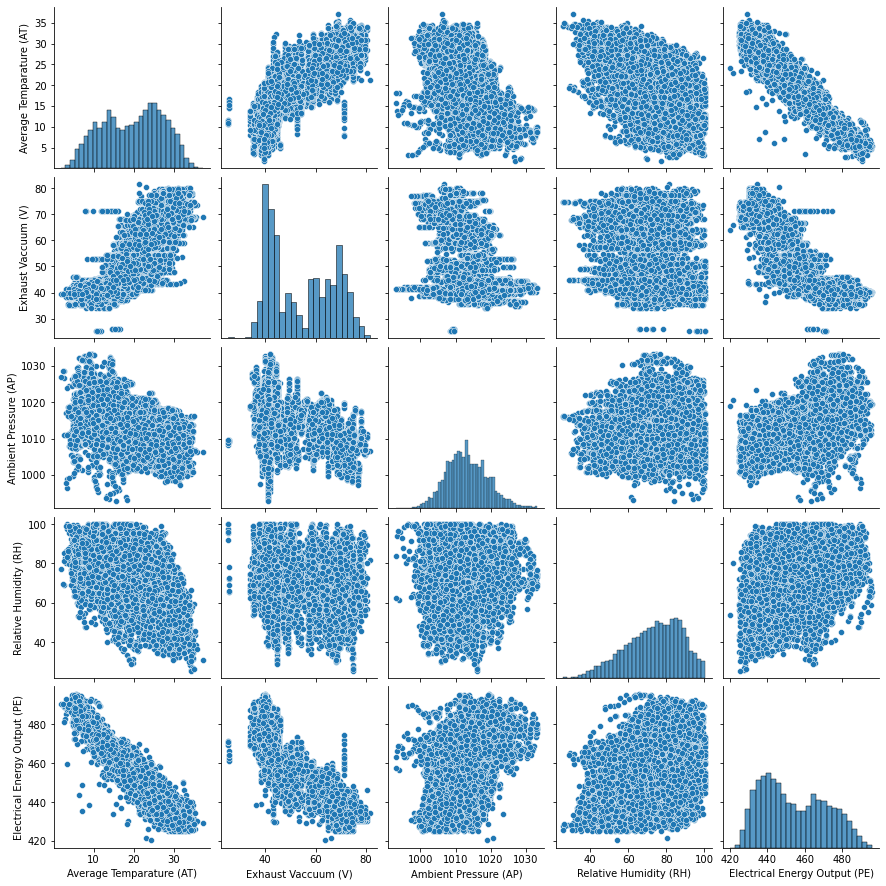

In [8]:
# Plot all the pairwise relationships
sns.pairplot(dataset)

In [9]:
# From a visual standpoint, the Average Temperature (AT) and Exhaust Vaccuum(V) attributes seem
# to be most correlated with the Electrical Energy Output (PE)
# We can use the correlation_matrix to numerically confirm our observation
correlation_matrix = dataset.corr().round(2)
correlation_matrix

,Average Temparature (AT),Exhaust Vaccuum (V),Ambient Pressure (AP),Relative Humidity (RH),Electrical Energy Output (PE)
Average Temparature (AT),1.00,0.84,-0.51,-0.54,-0.95
Exhaust Vaccuum (V),0.84,1.00,-0.41,-0.31,-0.87
Ambient Pressure (AP),-0.51,-0.41,1.00,0.10,0.52
Relative Humidity (RH),-0.54,-0.31,0.10,1.00,0.39
Electrical Energy Output (PE),-0.95,-0.87,0.52,0.39,1.00


<AxesSubplot:>

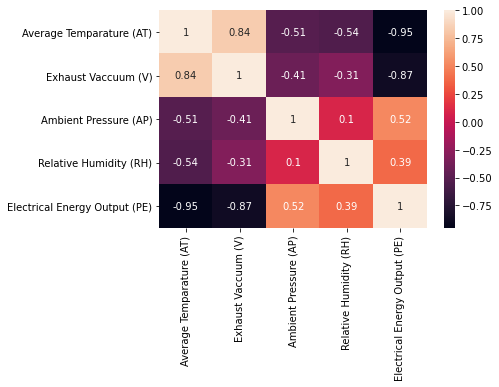

In [10]:
# Plot the heat map using the correlation matrix
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
# This confirms the correlation because the values for Average Temperature (AT) vs Electrical Energy Output (PE)
# and Exhaust Vaccuum(V) vs Electrical Energy Output (PE) are very close to -1.
# Therefore, we can look to use Average Temperature (AT) and Exhaust Vaccuum(V) as attributes
# and Electrical Energy Output (PE) as our Target Variable
# However, it looks like these 3 columns are not normally distributed.

In [12]:
# The X attribues are Average Temperature (AT) and Exhaust Vaccuum(V)
# The Y target variable is the Electrical Energy Output (PE)
X = dataset[['Average Temparature (AT)', 'Exhaust Vaccuum (V)']]
Y = dataset['Electrical Energy Output (PE)']

In [13]:
# Standardize the attributes
standard_scaler = StandardScaler()
X = pd.DataFrame(standard_scaler.fit(X).fit_transform(X))

<AxesSubplot:ylabel='Frequency'>

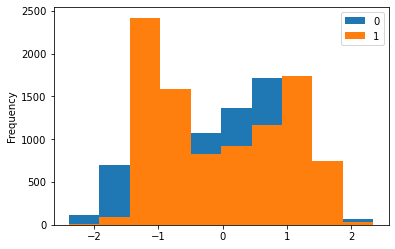

In [14]:
X.plot(kind="hist")

In [15]:
# Split the X and Y into training and testing sets in a 80%:20% split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7654, 2)
(1914, 2)
(7654,)
(1914,)


In [16]:
# Setup the SGDR model with our parameters
sgdr_model = SGDRegressor()

sgdr_model.fit(X_train, Y_train)

print(sgdr_model.score(X_train, Y_train))

0.9146476853708467


In [17]:
X_train = sm.add_constant(X_train)

ols_model = sm.OLS(Y_train, X_train).fit()

In [18]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Electrical Energy Output (PE)   R-squared:                       0.915
Model:                                       OLS   Adj. R-squared:                  0.915
Method:                            Least Squares   F-statistic:                 4.107e+04
Date:                           Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                                   20:30:11   Log-Likelihood:                -23161.
No. Observations:                           7654   AIC:                         4.633e+04
Df Residuals:                               7651   BIC:                         4.635e+04
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.3978      0.057   7968.260      0.000     454.286     454.510
0            -12.7217      0.106   -119.923      0.000     -12.930     -12.514
1             -4.0637      0.106    -38.211      0.000      -4.272      -3.855
==============================================================================
Omnibus:                      525.346   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2003.219
Skew:                          -0.255   Prob(JB):                         0.00
Kurtosis:                       5.454   Cond. No.                         3.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""